# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
onebedroom = pd.read_csv('data/City_MedianRentalPrice_1Bedroom.csv')
fourbedroom = pd.read_csv('data/City_MedianRentalPrice_4Bedroom.csv')
# onebedroom['bedrooms'] = 1
# fourbedroom['bedrooms'] = 4

In [3]:
onebedroom.shape

(818, 125)

In [4]:
fourbedroom.shape

(316, 125)

In [5]:
#find unique values of city, I believe this is why onebedroom has 500+ rows
onebedroom.RegionName.nunique()

773

In [6]:
fourbedroom.RegionName.nunique()

309

In [7]:
# All Rentals DF:
rentals = pd.concat([onebedroom, fourbedroom])

In [8]:
rentals.head()


,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


In [9]:
rentals.drop('Unnamed: 0', inplace=True, axis=1)
rentals.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


In [10]:
rentals.dtypes

RegionName     object
State          object
Metro          object
CountyName     object
SizeRank        int64
               ...   
2019-08       float64
2019-09       float64
2019-10       float64
2019-11       float64
2019-12       float64
Length: 124, dtype: object

In [11]:
# Will need to convert dates to date obj (will do in smaller df's) not in column names

rentals.head(1)

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0


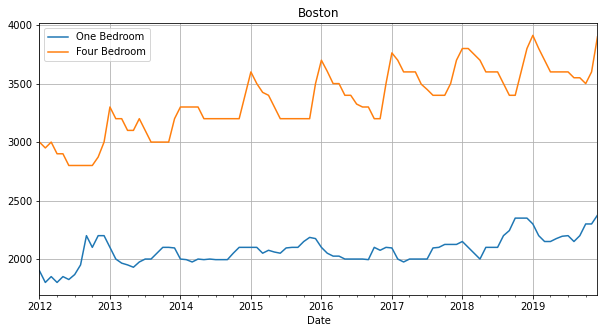

In [50]:
def get_city_data(city_name):
    city_data = rentals [rentals['RegionName'] == city_name]
    city_data = city_data.drop(city_data.columns[[0, 1, 2, 3, 4]], axis=1)
    
    # Produces 2x119 dataset. 1 bedroom and 4 bedrooms (rows) dates (columns). Rents held in dataset
    dates = []
    rental_prices1 = []
    rental_prices2 = []

    for col in city_data:
        dates.append(col)

    city_df = pd.DataFrame(dates, columns = ['Date'])

    # ONE BEDROOM PRICES
    for price in city_data.iloc[0]:
        rental_prices1.append(price)

    # FOUR BEDROOM PRICES
    for price in city_data.iloc[1]:
        rental_prices2.append(price)

    city_df['One Bedroom'] = rental_prices1
    city_df['Four Bedroom'] = rental_prices2

    # CLEAN DATA
    city_df = city_df.dropna()

    # CONVERT DATES TO DATETIME
    city_df.Date = city_df.Date.apply(pd.to_datetime, errors='coerce')

    return city_df



boston = get_city_data('Boston')

##################
# Plot Function


def get_city_line(data_frame, title):
    data_frame.plot(kind='line', x="Date", y=["One Bedroom", "Four Bedroom"], title=title, figsize=(10,5), grid=True)


    
get_city_line(boston, 'Boston')

In [13]:
### THOUGHTS:

### September prices are highest - when majority of leases renew / college students return

## Summer rental prices look low for 4 bedrooms - while there's a possible increase in 1 bedrooms?

## Are end of year rentals high because of low inventory?/no one moving during winter?



In [14]:
san_diego = get_city_data('San Diego')
san_diego.shape

(105, 3)

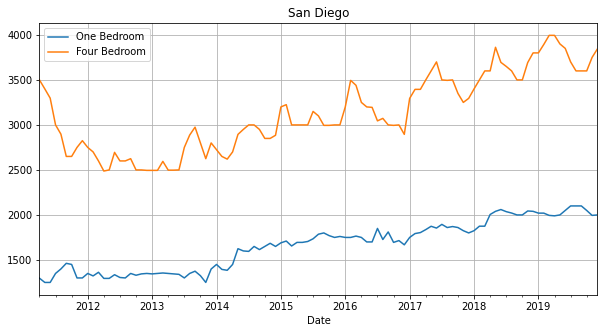

In [51]:
get_city_line(san_diego, 'San Diego')

In [16]:
new_york = get_city_data('New York')
new_york.shape

(65, 3)

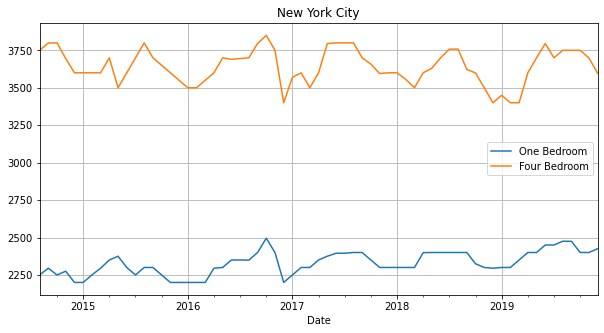

In [52]:
get_city_line(new_york, 'New York City')


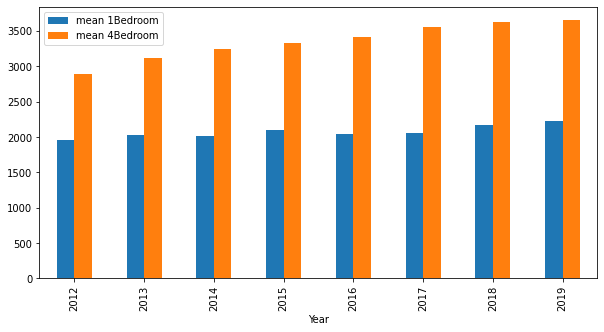

In [43]:

def get_city_yearly_avgs(city_df):
    city_group_by_year = city_df
    city_group_by_year['Year'] = city_df.Date.dt.year


    one_bed_mean = (city_group_by_year.groupby('Year')['One Bedroom']).agg(['mean']).round(2)
    four_bed_mean = (city_group_by_year.groupby('Year')['Four Bedroom']).agg(['mean']).round(2)


    yearly_mean = pd.merge(one_bed_mean, four_bed_mean, how='right', left_index=True, right_index=True, suffixes=(' 1Bedroom', ' 4Bedroom'))
    yearly_mean.plot( y=['mean 1Bedroom', 'mean 4Bedroom'], kind='bar',figsize=(10,5))


get_city_yearly_avgs(boston)



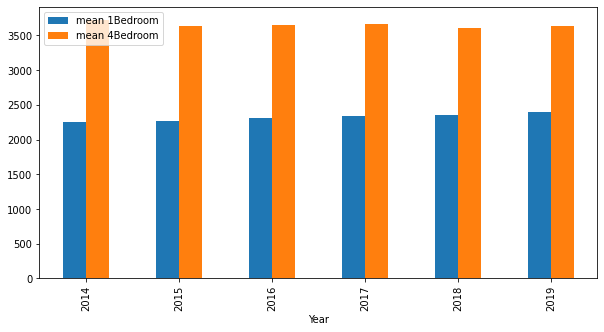

In [19]:
get_city_yearly_avgs(new_york)


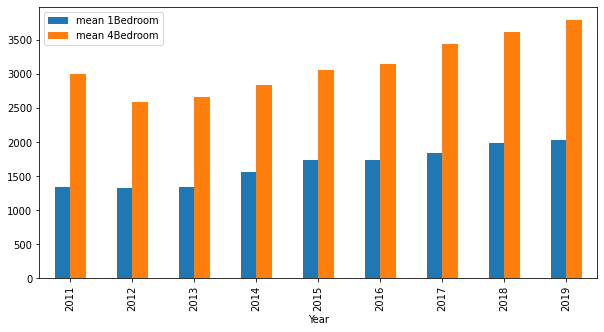

In [20]:
get_city_yearly_avgs(san_diego)




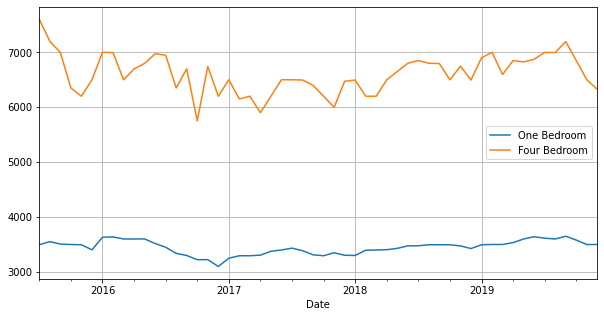

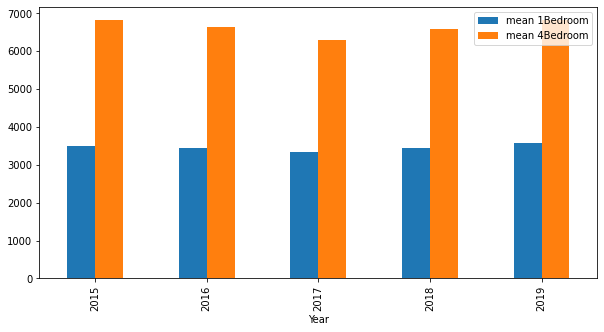

In [21]:
san_fran = get_city_data('San Francisco')
get_city_line(san_fran)
get_city_yearly_avgs(san_fran)

plt.show()



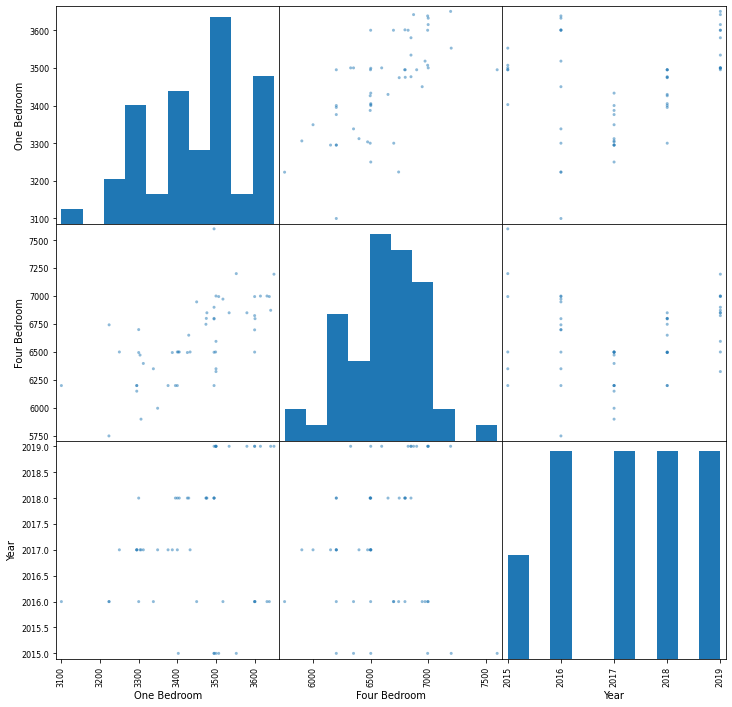

In [57]:

def get_city_scatter(city_df):
    pd.plotting.scatter_matrix(
        city_df,
        figsize=(12, 12),
    )

get_city_scatter(san_fran)



<AxesSubplot:title={'center':'Monthly Averages'}, xlabel='Date'>

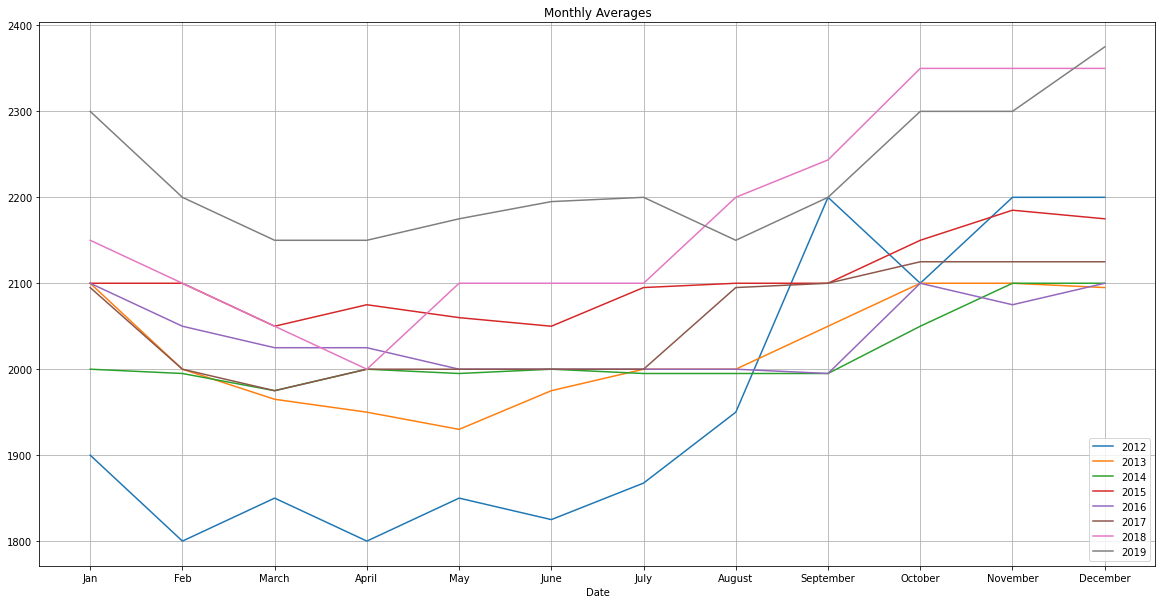

In [158]:
boston.tail(12)

# rent_2012['Date'] = (boston.head(12)[['Date', 'One Bedroom']]).Date.dt.month


#2012
# rent_by_month = (boston.head(12)[['Date']]).Date.dt.month
# month = boston.head(12)[['One Bedroom']]
# month = month.rename(columns={"One Bedroom": "2012"})
# rent_by_month = pd.concat([month])

#2013

# rent_by_month = (boston.iloc[0:12,1]).Date.dt.month
# rent_by_month = (boston.head(12)[['Date']]).Date.dt.month



# Define a dictionary containing Students data
data = {'Date': ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
  
# Convert the dictionary into DataFrame
rent_by_month = pd.DataFrame(data)


values = boston['One Bedroom'].values.tolist()


month = []

for i in range(12):
  month.append(values[i])

rent_by_month['2012'] = month


month = []

for i in range(12, 24):
  month.append(values[i])    

rent_by_month['2013'] = month


month = []

for i in range(24, 36):
  month.append(values[i])    

rent_by_month['2014'] = month


month = []

for i in range(36, 48):
  month.append(values[i])    

rent_by_month['2015'] = month


month = []

for i in range(48, 60):
  month.append(values[i])    

rent_by_month['2016'] = month


month = []

for i in range(60, 72):
  month.append(values[i])    

rent_by_month['2017'] = month


month = []

for i in range(72, 84):
  month.append(values[i])    

rent_by_month['2018'] = month


month = []

for i in range(84, 96):
  month.append(values[i])    

rent_by_month['2019'] = month


# rent_by_month.plot( y=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], kind='bar',figsize=(20,12))


rent_by_month.plot(kind='line', x="Date", y=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], title='Monthly Averages', xticks=range(0,12), figsize=(20,10), grid=True)


In [106]:
rentals[rentals['RegionName'] == "Boston"]

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
25,Boston,MA,Boston-Cambridge-Newton,Suffolk County,26,NaN,NaN,NaN,NaN,NaN,...,2150.0,2150.0,2175.0,2195.0,2200.0,2150.0,2200.0,2300.0,2300.0,2375.0
25,Boston,MA,Boston-Cambridge-Newton,Suffolk County,26,NaN,NaN,NaN,NaN,NaN,...,3700.0,3600.0,3600.0,3600.0,3600.0,3550.0,3550.0,3500.0,3600.0,3900.0
